In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

%matplotlib


Using matplotlib backend: module://matplotlib_inline.backend_inline


In [49]:
df = pd.read_csv('sales.csv')
test = pd.read_csv('real_data.csv')

In [50]:
df.drop('Unnamed: 0' ,axis=1,inplace=True)
test.drop('Unnamed: 0' ,axis=1,inplace=True)

In [51]:
df['date'] =pd.to_datetime(df['date'])
test['date'] =pd.to_datetime(test['date'])



In [52]:
df['state_holiday'].replace({'a': 1, 'b': 2 ,'c' :3},inplace=True)
test['state_holiday'].replace({'a': 1, 'b': 2 ,'c' :3},inplace=True)



In [53]:
df['state_holiday'] =df['state_holiday'].astype(int)
test['state_holiday'] =test['state_holiday'].astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

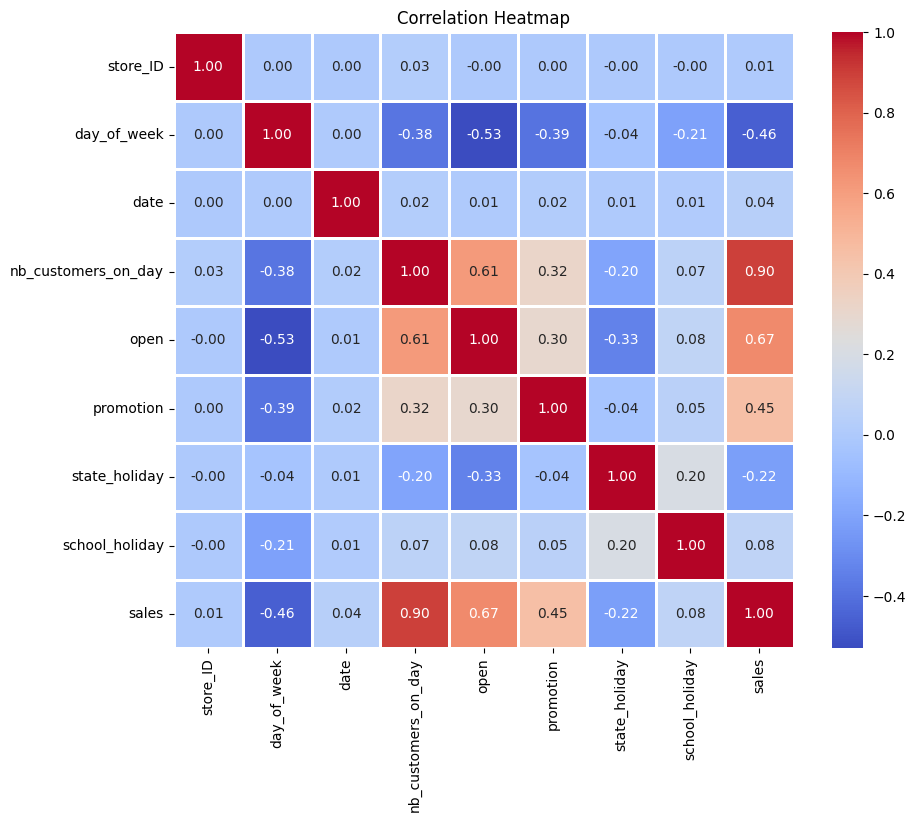

In [54]:


corr_matrex = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrex,annot=True,fmt='.2f',linewidths=1,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show

In [ ]:

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.drop(columns=['date'], inplace=True)

In [ ]:

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

test.drop(columns=['date'], inplace=True)

In [ ]:
X = df.drop('sales',axis=1) 
y = df['sales']

X_train , X_test , y_train , y_test =train_test_split(X,y,
                                                    shuffle=False,
                                                     test_size=0.2
                                                     
                                               
                                               
                                              )

In [58]:
model = RandomForestRegressor(n_jobs=-1)
model_xgb = XGBRegressor()


In [ ]:
from sklearn.model_selection import GridSearchCV

# تعريف المعلمات التي سيتم البحث عنها
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# إنشاء النموذج
rf = RandomForestRegressor()

# تطبيق GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1)

# تشغيل البحث عن أفضل المعلمات
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [59]:
model.fit(X_train,y_train)
# model_xgb.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [60]:

y_pred = model.predict(X_test)

# حساب مقاييس التقييم
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# عرض النتائج
{
    "R² Score": r2,
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse
}

{'R² Score': 0.9416771787395762,
 'Mean Absolute Error (MAE)': np.float64(588.0431301207461),
 'Mean Squared Error (MSE)': np.float64(911903.9820383822),
 'Root Mean Squared Error (RMSE)': np.float64(954.9366377086923)}